In [1]:
import os
import tensorflow as tf
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

In [2]:
pictures_list = os.listdir("frames")
pictures_list = [i for i in pictures_list if i.split(".")[-1] == "jpg"]

In [4]:
len(pictures_list)

10000

In [5]:
categories = os.listdir("labelled")
categories

['bramka', 'closeup', 'crowd', 'faul', 'out', 'playingfield']

In [12]:
X = []
y = []

for category in categories:
    imgs = os.listdir(f"labelled/{category}")
    for img in imgs:
        X.append(img)
        y.append(category)    

In [13]:
len(X)

1012

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, shuffle=True)

In [29]:
len(x_train)

708

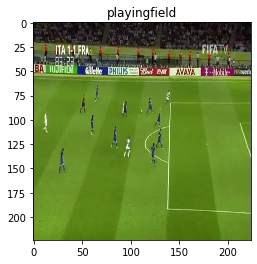

In [32]:
import matplotlib.pyplot as plt
from PIL import Image

id_ = 70

img_path = f"{os.getcwd()}/labelled/{y_train[id_]}/{x_train[id_]}"

plt.imshow(Image.open(img_path))
plt.title(y_train[id_])
plt.show()